In [1]:
# Importing necessary libraries for data analysis and visualization

import json
from datetime import datetime
from pandas.api.types import is_datetime64_any_dtype
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt  # For creating various plots and visualizations
import numpy as np
import pandas as pd  # For handling and manipulating structured data (tables, CSV, etc.)
import seaborn as sns  # For advanced data visualization with statistical capabilities

# Importing automatic data profiling tool
import ydata_profiling as yd  # Used to generate a report with statistics, correlations, and distributions for data exploration

# Importing time series analysis tools from pandas and statsmodels
from pandas.plotting import (
    lag_plot,
)  # For visualizing lag correlations in time series data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Importing seasonal decomposition tool for time series analysis
from statsmodels.tsa.seasonal import (
    seasonal_decompose,
)  # To decompose a time series into trend, seasonality, and residual components

# Importing statistical test for stationarity
from statsmodels.tsa.stattools import (
    adfuller,
)  # Augmented Dickey-Fuller (ADF) test to check stationarity of a time series

In [2]:
%matplotlib inline

In [3]:
# Load the dataset
df = pd.read_csv(
    "datasets/Month_Value_2.csv",
    parse_dates=True,
)
# Try to detect a datetime column
for col in df.columns:
    df[col] = pd.to_datetime(
        df[col], errors="coerce"
    )  # Convert to datetime if possible
    if is_datetime64_any_dtype(df[col]):
        df.set_index(col, inplace=True)
        print(f"Set '{col}' as the datetime index.")
        break
df.dtypes

Set 'Period' as the datetime index.


Revenue                                     object
Sales_quantity                              object
Average_cost                                object
The_average_annual_payroll_of_the_region    object
dtype: object

In [4]:
DataProfile = yd.ProfileReport(df)
DataProfile.to_file("Profile.json")
DataProfile.to_file("Profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# Basic exploration
print(df.head())
print(df.info())
print(df.describe())

                    Revenue Sales_quantity      Average_cost  \
Period                                                         
2015-01-01    16010072.1195          12729  1257.76354148008   
2015-01-02  15807587.449808          11636  1358.50699981162   
2015-01-03  22047146.023644          15922  1384.69702447205   
2015-01-04   18814583.29428          15227  1235.60670481907   
2015-01-05  14021479.611678           8620  1626.62176469582   

           The_average_annual_payroll_of_the_region  
Period                                               
2015-01-01                                 30024676  
2015-01-02                                 30024676  
2015-01-03                                 30024676  
2015-01-04                                 30024676  
2015-01-05                                 30024676  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2015-01-01 to 2022-01-12
Data columns (total 4 columns):
 #   Column                                    Non-

In [6]:
def handle_missing_values(df):

    for column in df.columns:
        df[column] = pd.to_numeric(
            df[column],
            errors="coerce",
        )

        if df[column].isna().sum() > 0 or np.isinf(df[column]).sum() > 0:

            print(f"Handling missing values in {column}")


            # Remplacer les valeurs infinies par NaN


            df[column] = df[column].replace([np.inf, -np.inf], np.nan)


            # Calcul du ratio de valeurs manquantes

            missing_ratio = df[column].isna().sum() / len(df)


            # Choix de la stratégie selon le pourcentage de NaN


            if missing_ratio < 0.05:

                strategy = "mean"  # Moins de 5% → Remplacement par la moyenne

                df[column].fillna(df[column].mean(), inplace=True)

            elif missing_ratio < 0.2:


                strategy = "interpolation"  # Entre 5% et 20% → Interpolation linéaire

                df[column].interpolate(method="linear", inplace=True)

            else:


                strategy = "median"  # Plus de 20% → Remplacement par la médiane

                df[column].fillna(df[column].median(), inplace=True)


            print(f"Applied {strategy} strategy for {column}")

    df.to_csv("df.csv")


    return df


# def convert_if_majority_numeric(dataframe):
#     # print(dataframe)
#     df1 = dataframe
#     df1.dropna(inplace=True)
#     """Convert string numbers to numeric values only if most elements are numeric."""
#     for column in df1.columns:
#         type_counts = df[column].apply(lambda x: is_numeric_dtype(x)).value_counts()
#         for x in df[column]:
#             print(type(x))

#         # Check if majority is numeric
#         majority_is_numeric = type_counts.get(True, 0) > type_counts.get(False, 0)
#         print(column, " : ", type_counts.get(True, 0))
#         print(
#             column,
#             " : ",
#         )
#         print(column, " : ", majority_is_numeric)

#         if majority_is_numeric:
#             df[column] = pd.to_numeric(
#                 df[column],
#                 errors="coerce",
#             )  # Convert only if majority is numeric
#             print("converted")

In [7]:
df = handle_missing_values(df)
# convert_if_majority_numeric(df)
# print(df)

def generate_mlops_report(df):
    """

    Generate a machine-interpretable EDA report for MLOps preprocessing


    Parameters:

    df (pandas.DataFrame): Input time series dataframe


    Returns:

    dict: Structured, machine-readable analysis report
    """

    report = {

        "dataset_metadata": {

            "total_columns": len(df.columns),

            "total_rows": len(df),

            "date_range": {"start": str(df.index.min()), "end": str(df.index.max())},
        },

        "preprocessing_recommendations": {

            "stationarity": {},

            "seasonality": {},

            "feature_scaling": [],

            "feature_engineering": [],

        },

        "statistical_insights": {

            "descriptive_stats": {},

            "correlations": {"significant_correlations": [], "correlation_matrix": {}},

        },

    }


    # Stationarity Analysis and Seasonality Detection


    for column in df.columns:

        # Stationarity
        try:

            adf_result = adfuller(df[column])
        except Exception as e:
            print(e)

        report["preprocessing_recommendations"]["stationarity"][column] = {

            "is_stationary": str(adf_result[1] < 0.05),

            "p_value": float(adf_result[1]),

            "transformation_needed": "YES" if adf_result[1] >= 0.05 else "NO",

        }


        # Seasonality

        seasonal_period = 12  # (12 pour mensuel, 7 pour journalier)

        decomposition = seasonal_decompose(
            df[column], model="additive", period=seasonal_period
        )

        seasonal_strength = np.var(decomposition.seasonal) / np.var(df[column])


        report["preprocessing_recommendations"]["seasonality"][column] = {

            "has_seasonality": str(
                seasonal_strength > 0.1
            ),  # Threshold to detect seasonality

            "seasonal_strength": float(seasonal_strength),

            "transformation_needed": "YES" if seasonal_strength > 0.1 else "NO",

        }


        if seasonal_strength > 0.1:  # Seuil to adjust

            report["preprocessing_recommendations"]["feature_engineering"].append(
                {
                    "column": column,
                    "suggested_transformations": [
                        "seasonal_differencing",
                        "fourier_terms",
                    ],
                }
            )

        # Recommend transformations if not stationary

        if adf_result[1] >= 0.05:

            report["preprocessing_recommendations"]["feature_engineering"].append(
                {
                    "column": column,
                    "suggested_transformations": [
                        "log_transformation",
                        "differencing",
                        "rolling_mean_normalization",
                    ],
                }
            )

    #


    # Descriptive Statistics

    for column in df.columns:

        report["statistical_insights"]["descriptive_stats"][column] = {

            "mean": float(df[column].mean()),

            "std": float(df[column].std()),

            "min": float(df[column].min()),

            "max": float(df[column].max()),

        }


    # Correlation Analysis

    corr_matrix = df.corr()

    report["statistical_insights"]["correlations"]["correlation_matrix"] = {
        str(col): {
            str(subcol): float(corr_matrix.loc[col, subcol]) for subcol in df.columns
        }
        for col in df.columns
    }


    # Significant Correlations

    for col1 in df.columns:

        for col2 in df.columns:

            if col1 != col2:

                correlation = float(corr_matrix.loc[col1, col2])

                if abs(correlation) > 0.5:

                    report["statistical_insights"]["correlations"][
                        "significant_correlations"
                    ].append(
                        {
                            "features": [col1, col2],
                            "correlation": correlation,
                            "strength": (
                                "strong" if abs(correlation) > 0.7 else "moderate"
                            ),
                        }
                    )


    # Feature Scaling Recommendations

    for column in df.columns:

        if df[column].std() > 1:  # Suggest scaling for features with high variance

            report["preprocessing_recommendations"]["feature_scaling"].append(
                {
                    "column": column,
                    "recommended_method": ["standardization", "min_max_scaling"],
                }
            )

    return report



# Generate and save the report

final_report = generate_mlops_report(df)


# Save to JSON

with open('mlops_eda_report.json', 'w') as f:

    json.dump(final_report, f, indent=4)


print("MLOps-friendly EDA Report generated and saved to 'mlops_eda_report.json'")
df.head(15)

Handling missing values in Revenue
Applied median strategy for Revenue
Handling missing values in Sales_quantity
Applied median strategy for Sales_quantity
Handling missing values in Average_cost
Applied median strategy for Average_cost
Handling missing values in The_average_annual_payroll_of_the_region
Applied median strategy for The_average_annual_payroll_of_the_region
MLOps-friendly EDA Report generated and saved to 'mlops_eda_report.json'


C:\Users\raedb\AppData\Local\Temp\ipykernel_14144\549907468.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\raedb\AppData\Local\Temp\ipykernel_14144\549907468.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
2015-01-02,1.580759e+07,11636.0,1358.507000,30024676.0
2015-01-03,2.204715e+07,15922.0,1384.697024,30024676.0
2015-01-04,1.881458e+07,15227.0,1235.606705,30024676.0
2015-01-05,1.402148e+07,8620.0,1626.621765,30024676.0
2015-01-06,1.678393e+07,13160.0,1275.374508,30024676.0
2015-01-07,1.916189e+07,17254.0,1110.576805,30024676.0
2015-01-08,1.520498e+07,8642.0,1759.428870,30024676.0
2015-01-09,3.263782e+07,18410.5,1654.399798,28197847.0


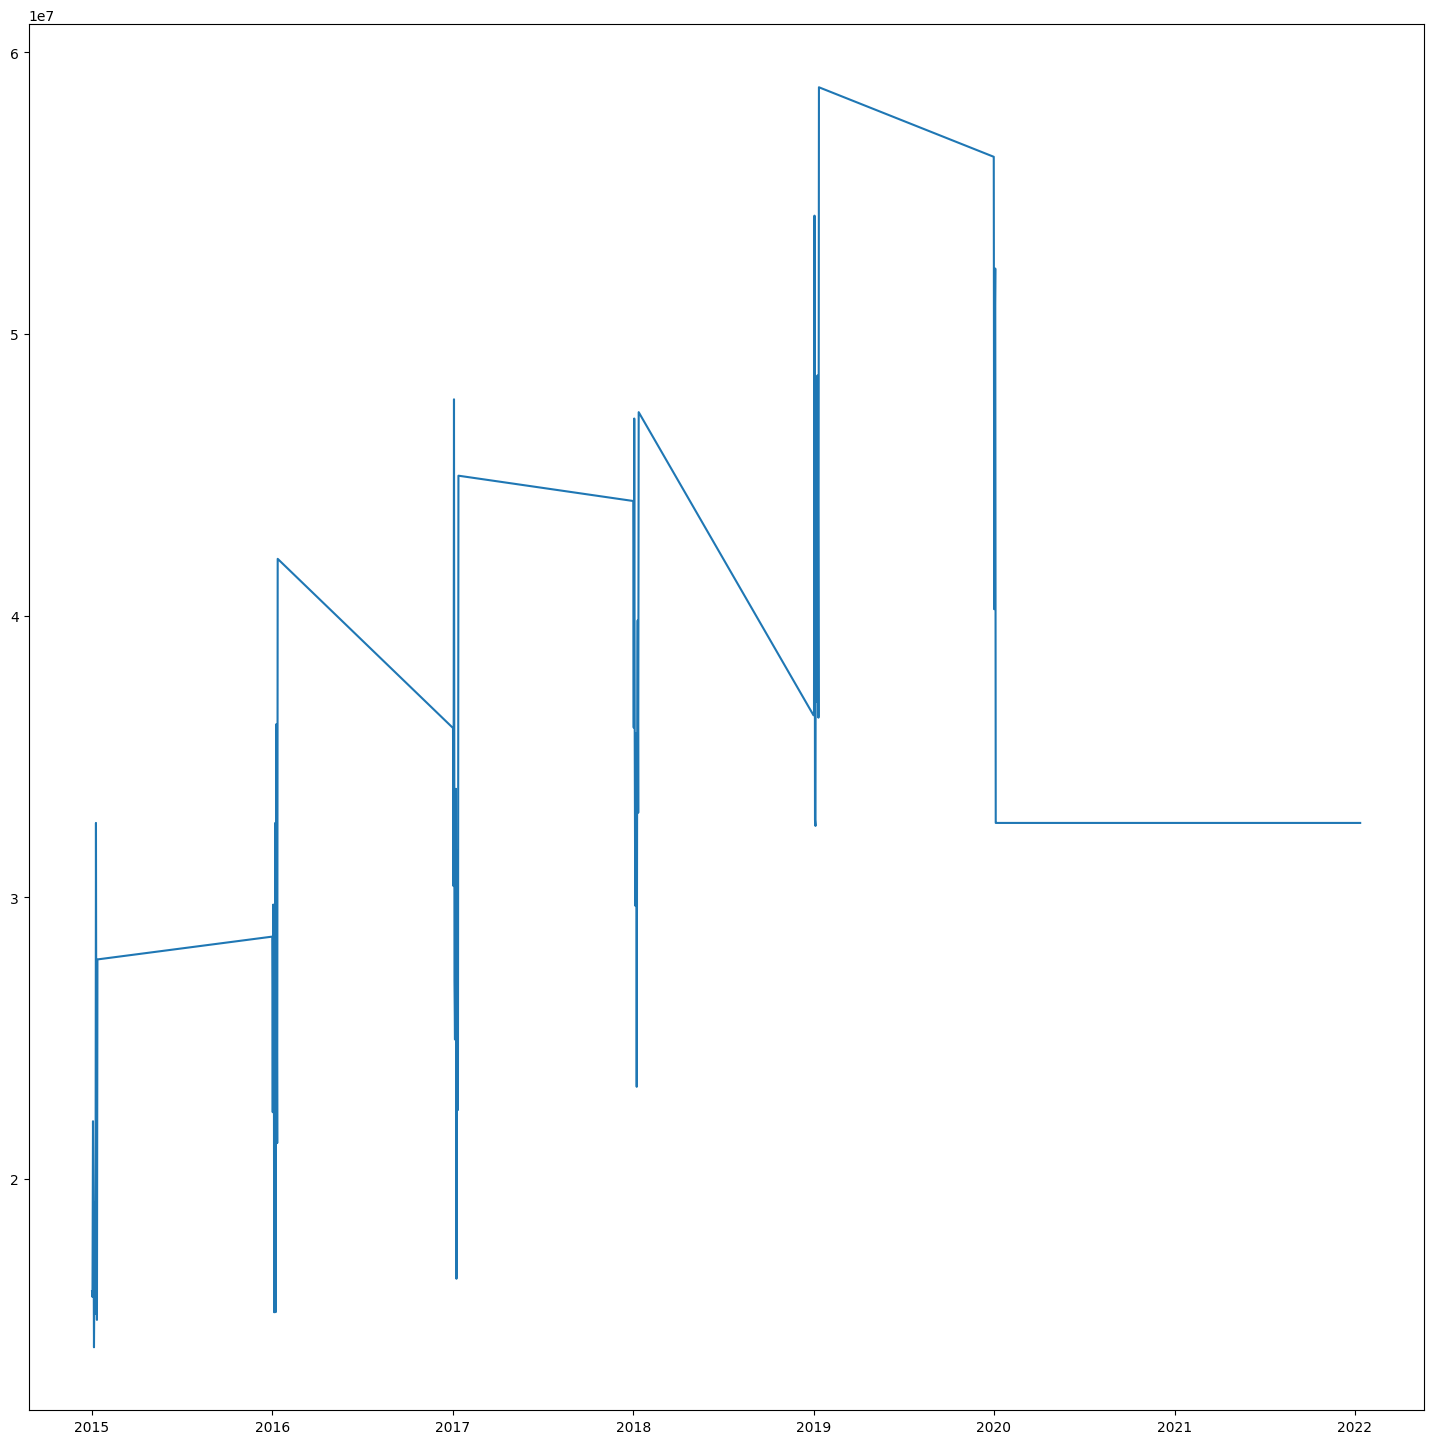

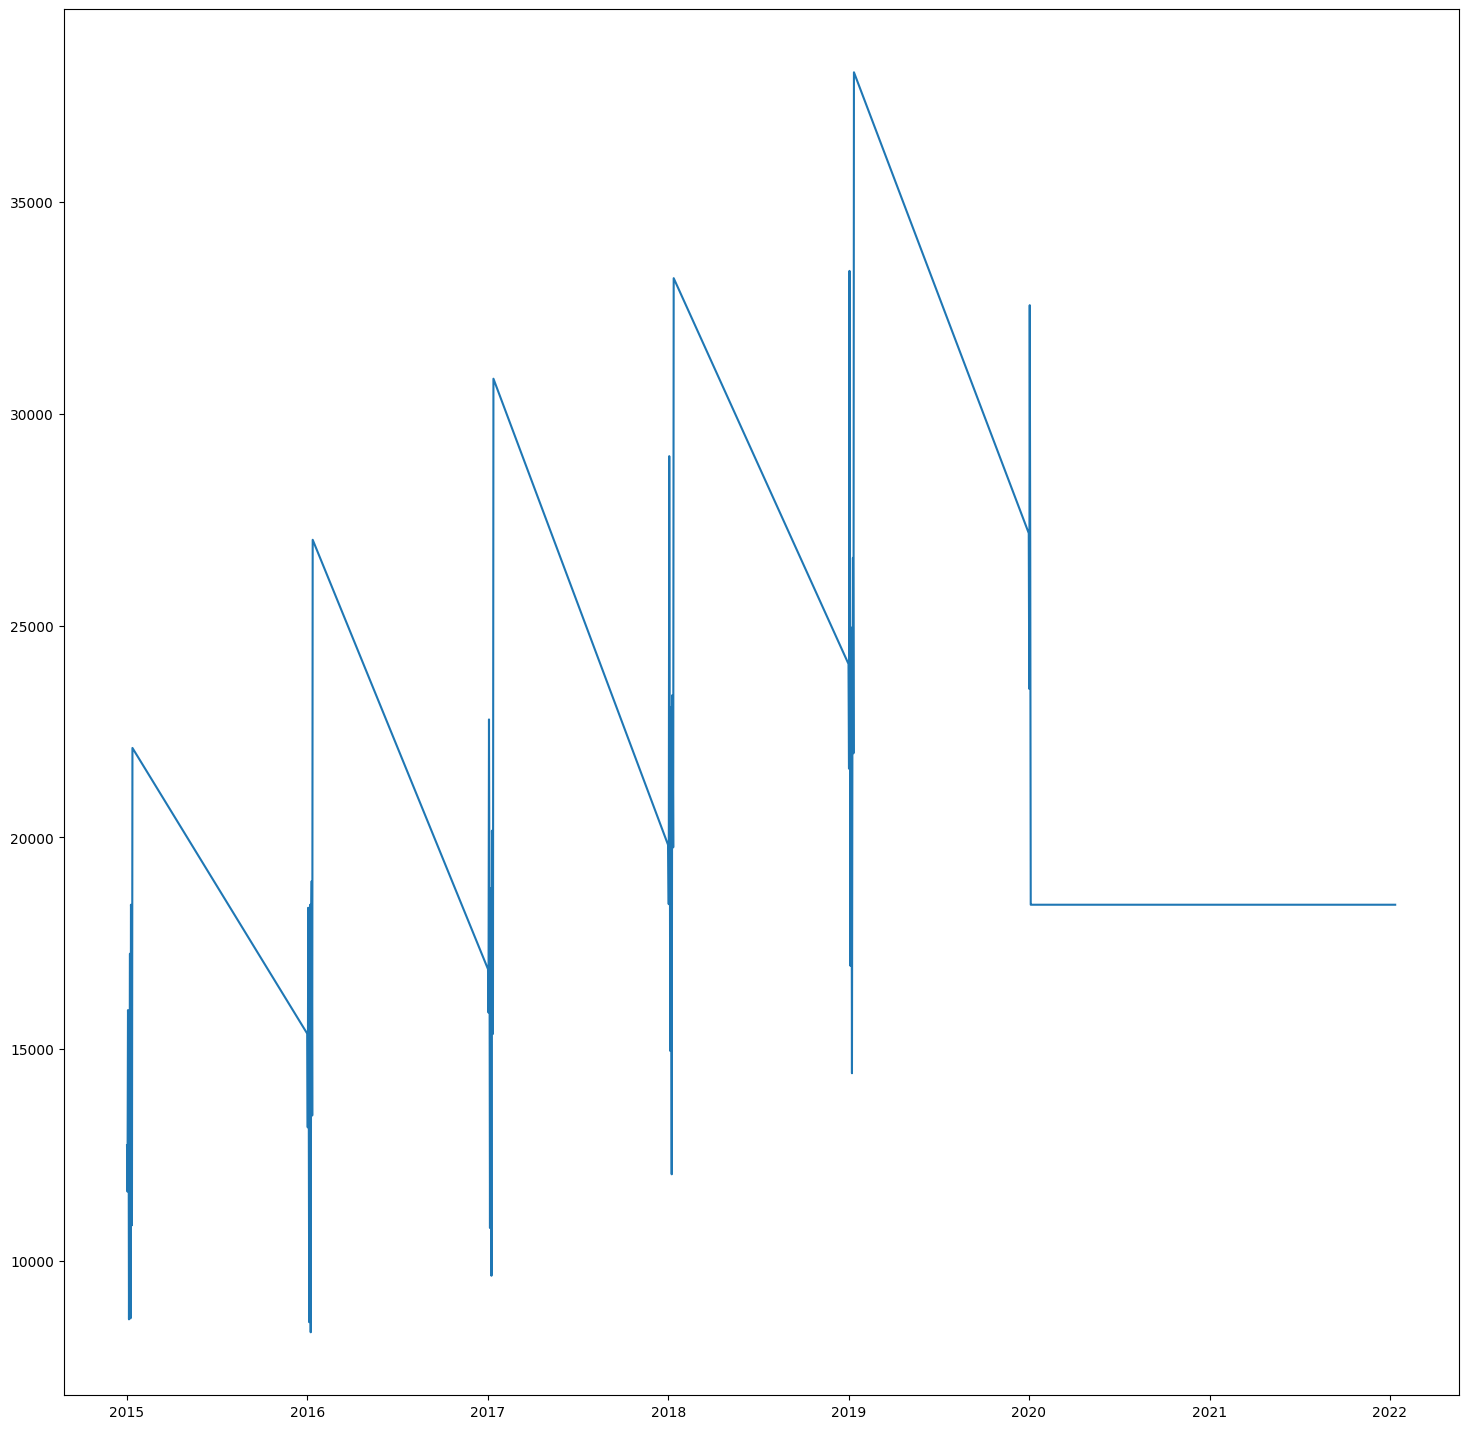

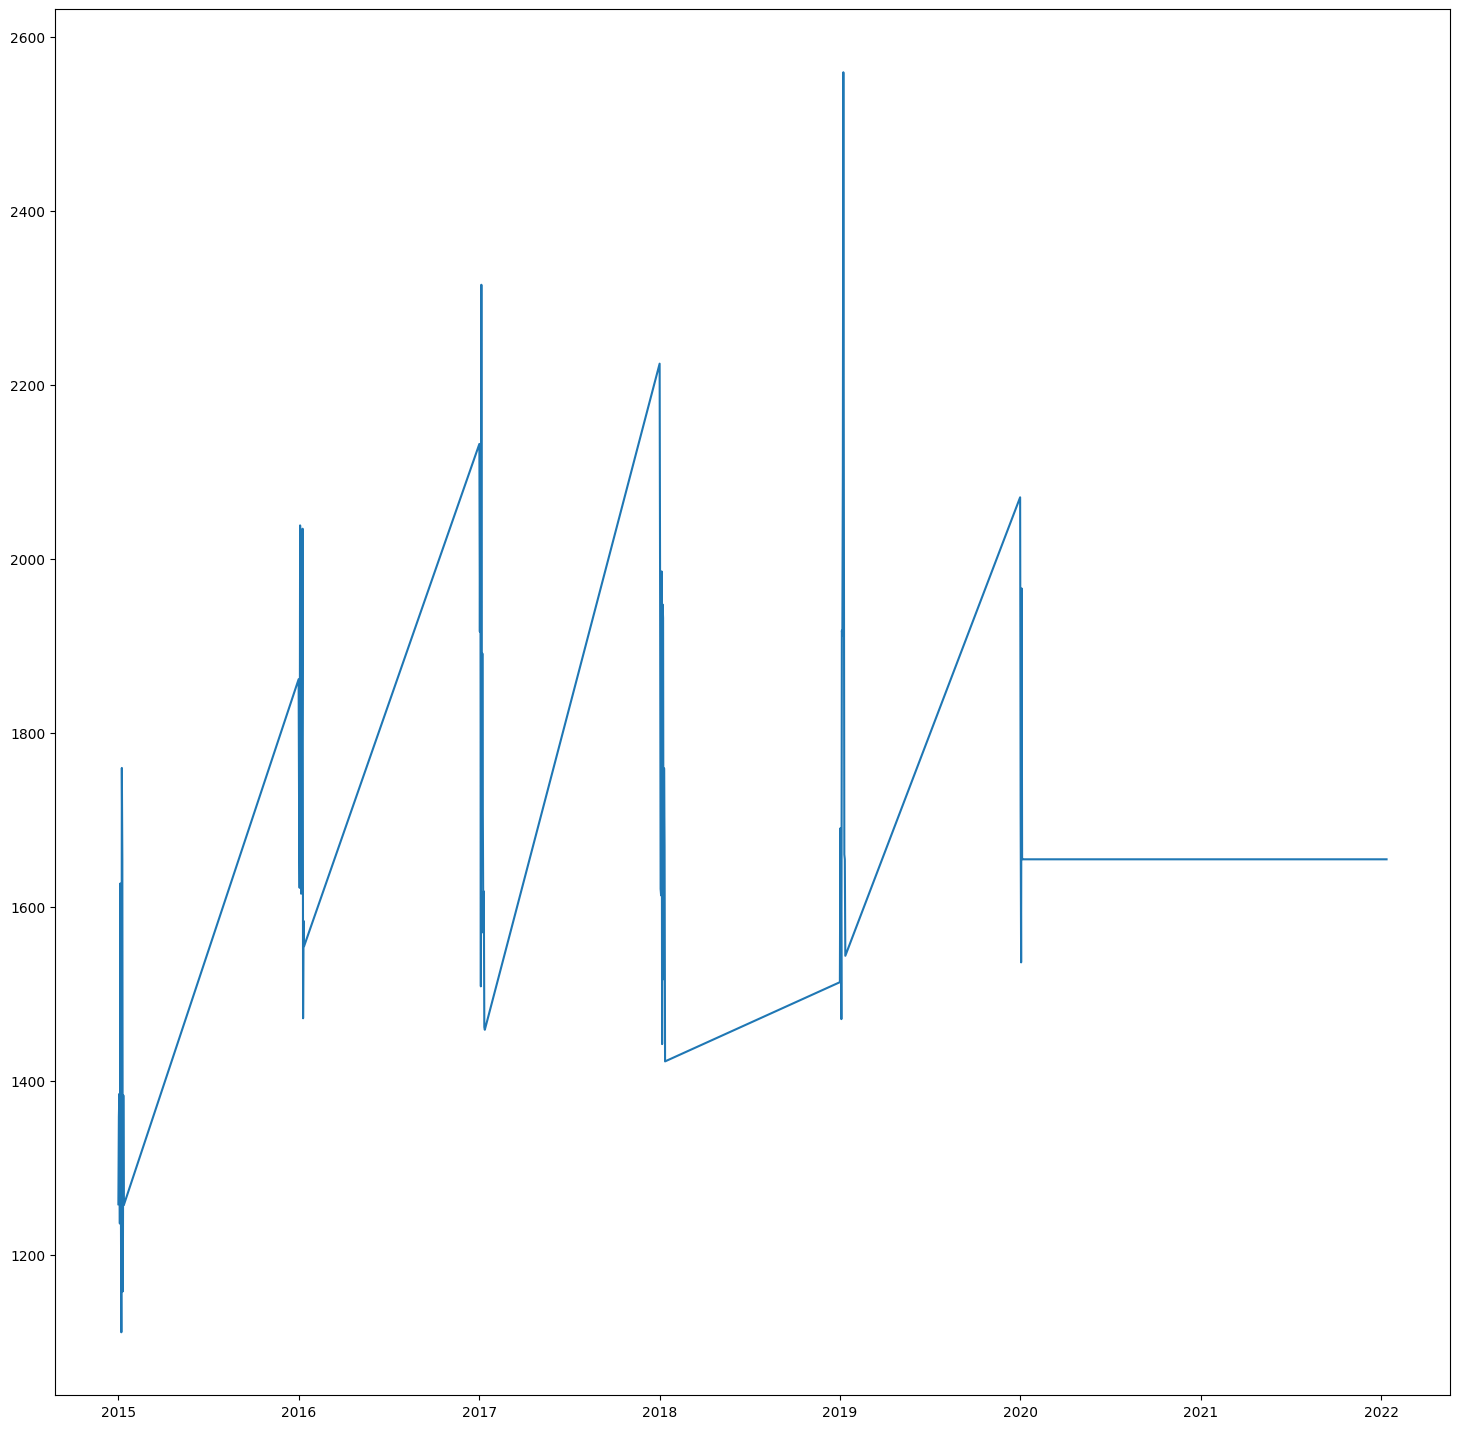

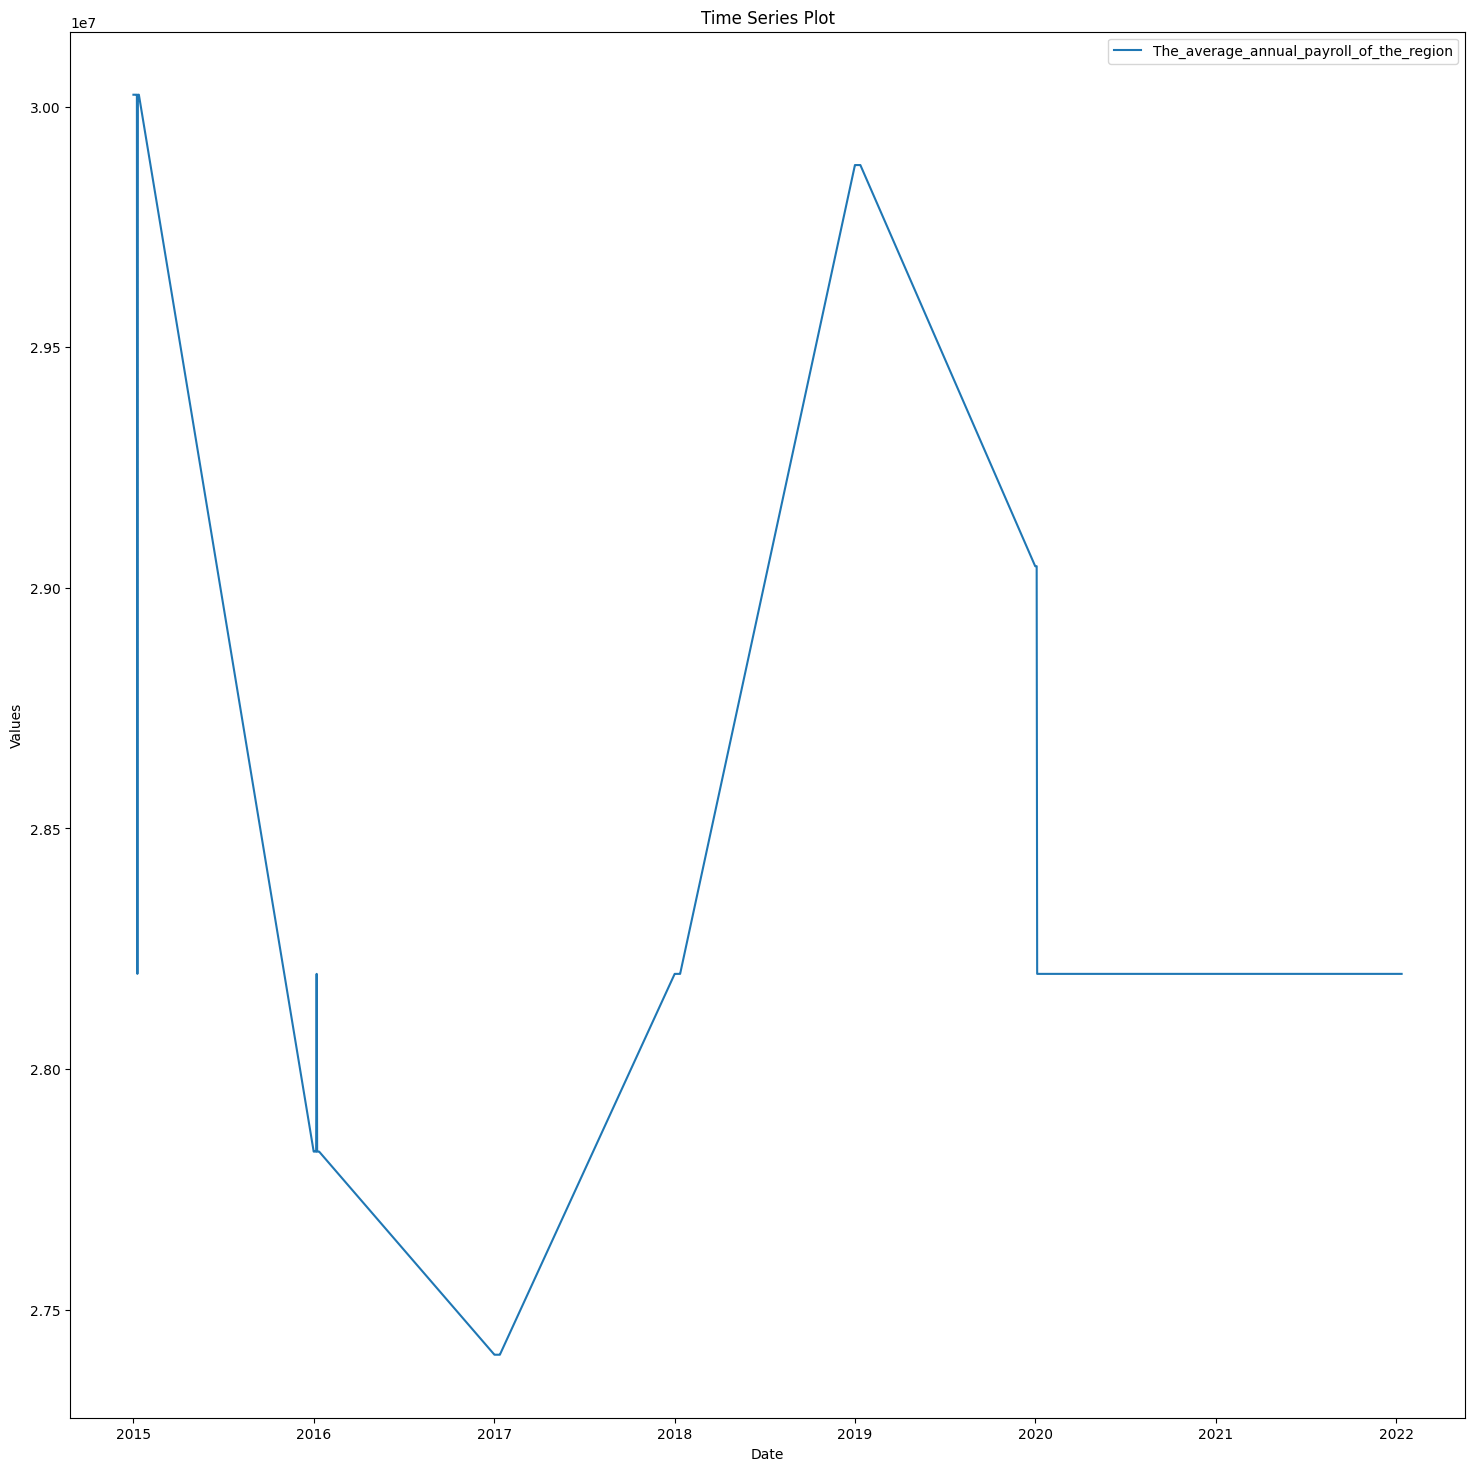

In [8]:
for column in df.columns:
    plt.figure(df.columns.get_loc(column) + 1, figsize=(18, 18))
    # Plot the time series data for the current column
    plt.plot(df.index, df[column], label=column)
plt.title("Time Series Plot")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.show()


Analyzing column: Revenue
ADF Statistic for Revenue: -1.9544830706275738
p-value for Revenue: 0.3068801212353678


<Figure size 2000x1400 with 0 Axes>

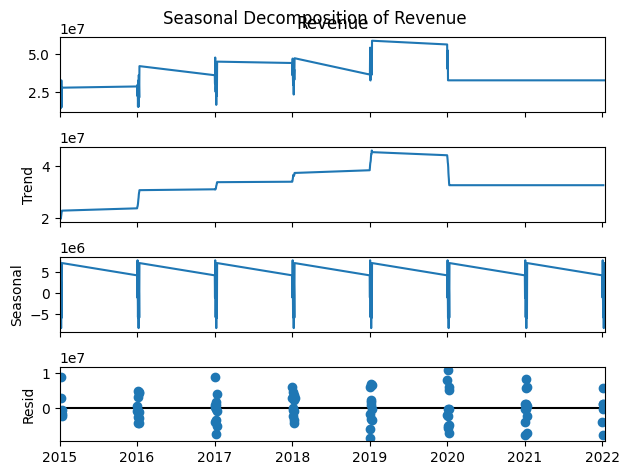


Analyzing column: Sales_quantity
ADF Statistic for Sales_quantity: -1.7053158300609537
p-value for Sales_quantity: 0.428375703553088


<Figure size 2000x1400 with 0 Axes>

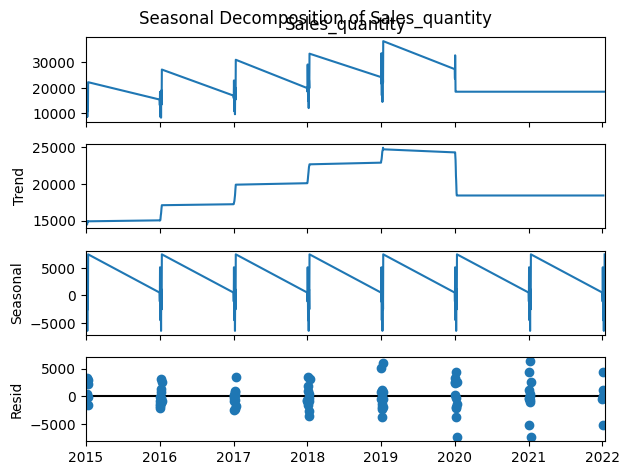


Analyzing column: Average_cost
ADF Statistic for Average_cost: -7.344943114227547
p-value for Average_cost: 1.041531543243832e-10


<Figure size 2000x1400 with 0 Axes>

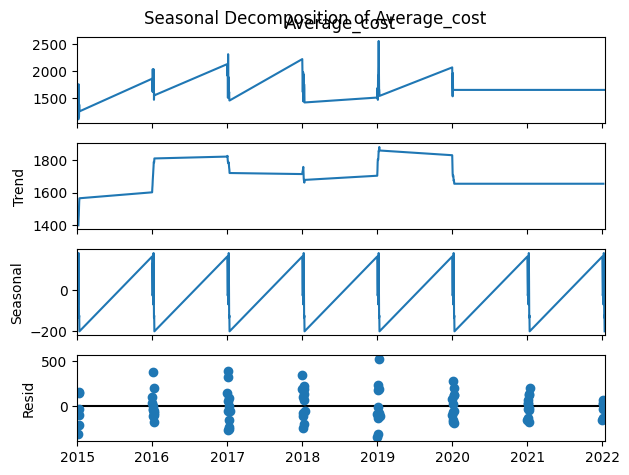


Analyzing column: The_average_annual_payroll_of_the_region
ADF Statistic for The_average_annual_payroll_of_the_region: -2.719555104825999
p-value for The_average_annual_payroll_of_the_region: 0.07071507924488164


<Figure size 2000x1400 with 0 Axes>

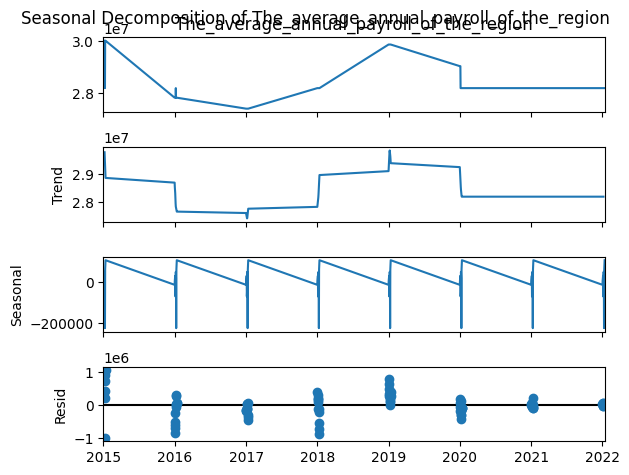

In [9]:
# Loop through each column in the DataFrame to perform stationarity testing and seasonal decomposition
for column in df.columns:
    print(
        f"\nAnalyzing column: {column}"
    )  # Print the name of the column being analyzed

    # Create a new figure for the decomposition plot
    plt.figure(figsize=(20, 14))

    # --- Augmented Dickey-Fuller (ADF) Test for Stationarity ---
    adf_result = adfuller(df[column])  # Perform the ADF test on the current column
    print(f"ADF Statistic for {column}: {adf_result[0]}")  # Print the test statistic
    print(
        f"p-value for {column}: {adf_result[1]}"
    )  # Print the p-value (to check stationarity)

    # The ADF test helps determine if a time series is stationary.
    # If p-value < 0.05, we reject the null hypothesis and conclude that the series is stationary.

    # --- Seasonal Decomposition ---
    # Decompose the time series into trend, seasonality, and residuals using an additive model
    decomposition = seasonal_decompose(df[column], model="additive", period=12)

    # Plot the decomposition results (observed, trend, seasonal, and residual components)
    decomposition.plot()

    # Set a title for the decomposition plot
    plt.suptitle(f"Seasonal Decomposition of {column}")

    # Display the plots
    plt.show()

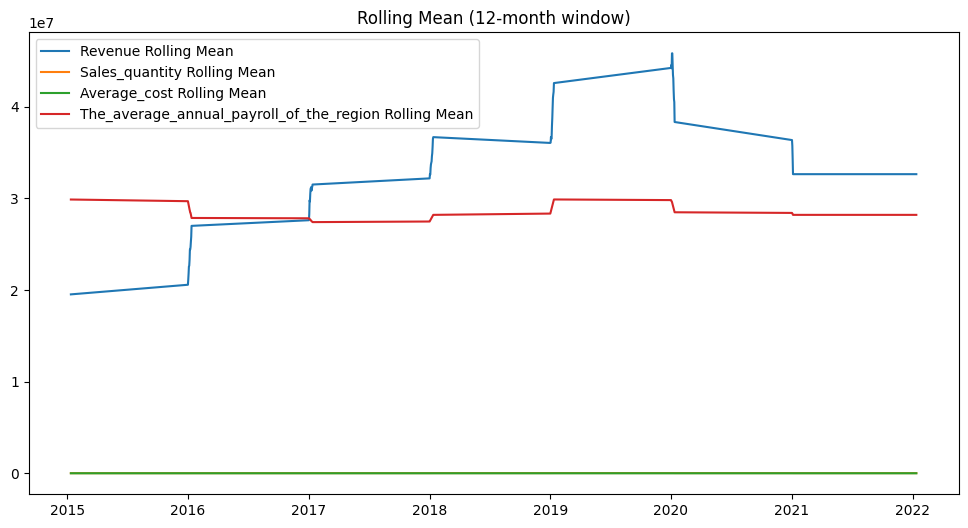

In [10]:
# Compute the rolling mean with a 12-month window for smoothing time series data
rolling_means = df.rolling(window=12).mean()

# Create a new figure with a specific size
plt.figure(figsize=(12, 6))

# Loop through each column in the DataFrame to plot its rolling mean
for column in df.columns:
    plt.plot(rolling_means.index, rolling_means[column], label=f"{column} Rolling Mean")

# Set the title of the plot
plt.title("Rolling Mean (12-month window)")

# Add a legend to indicate which rolling mean corresponds to which column
plt.legend()

# Display the plot
plt.show()

Correlation Matrix:
                                           Revenue  Sales_quantity  \
Revenue                                   1.000000        0.886156   
Sales_quantity                            0.886156        1.000000   
Average_cost                              0.345880       -0.093380   
The_average_annual_payroll_of_the_region  0.009402        0.125658   

                                          Average_cost  \
Revenue                                        0.34588   
Sales_quantity                                -0.09338   
Average_cost                                   1.00000   
The_average_annual_payroll_of_the_region      -0.24404   

                                          The_average_annual_payroll_of_the_region  
Revenue                                                                   0.009402  
Sales_quantity                                                            0.125658  
Average_cost                                                             -0.244040 

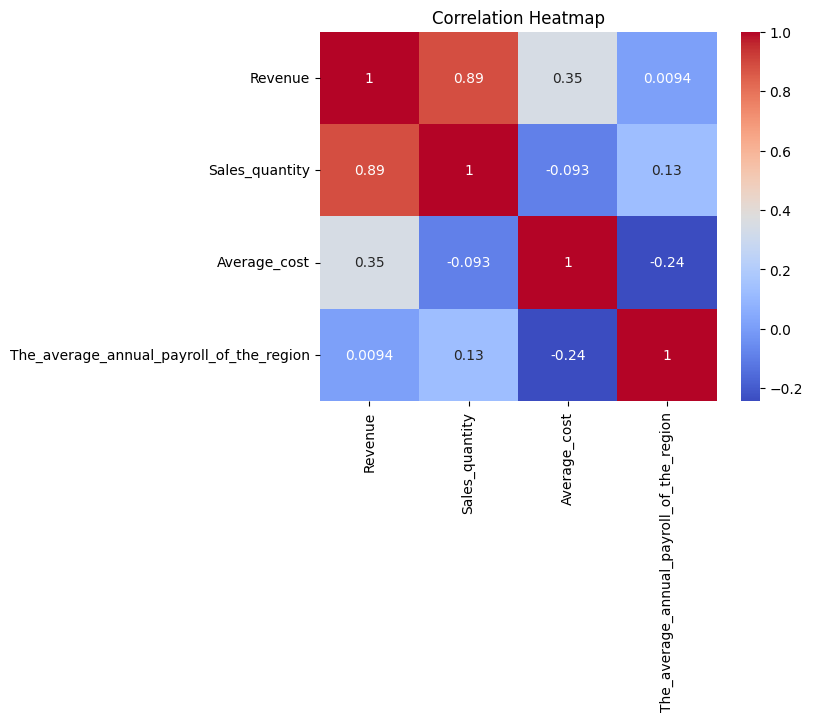

In [11]:
# Compute the correlation matrix for all numerical columns in the DataFrame
df_corr = df.corr()

# Print the correlation matrix to inspect the numerical relationships between variables
print("Correlation Matrix:")
print(df_corr)

# Create a heatmap to visualize the correlation matrix
sns.heatmap(df_corr, annot=True, cmap="coolwarm")

# Set the title for the heatmap
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()

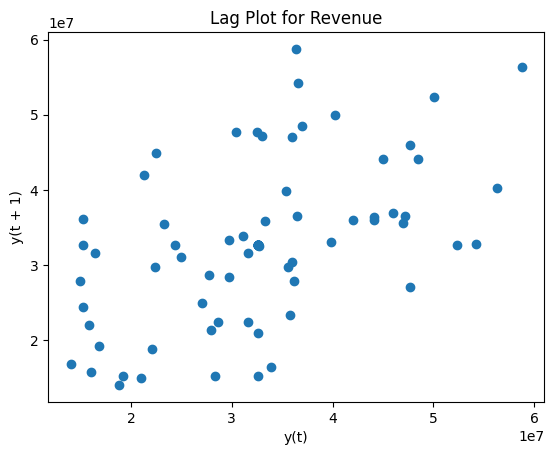

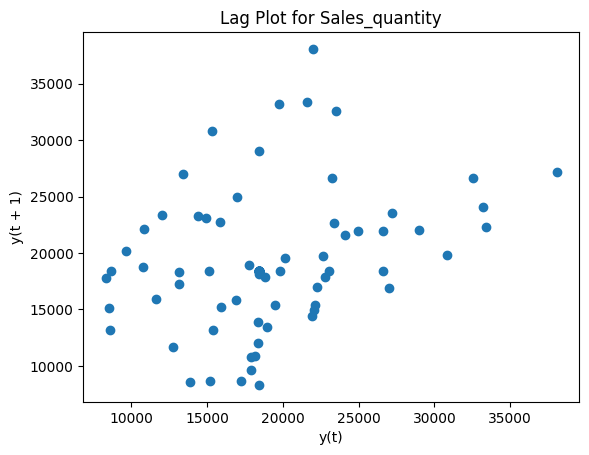

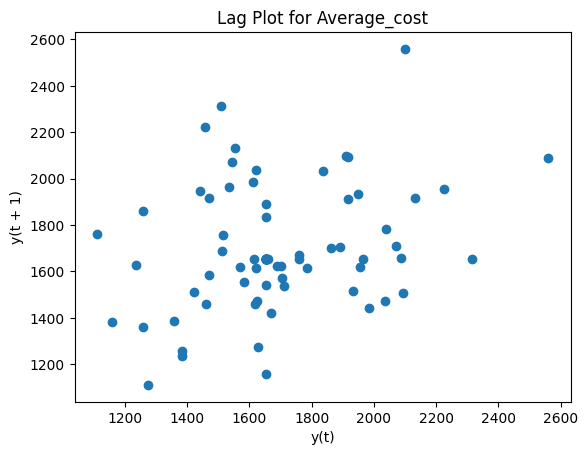

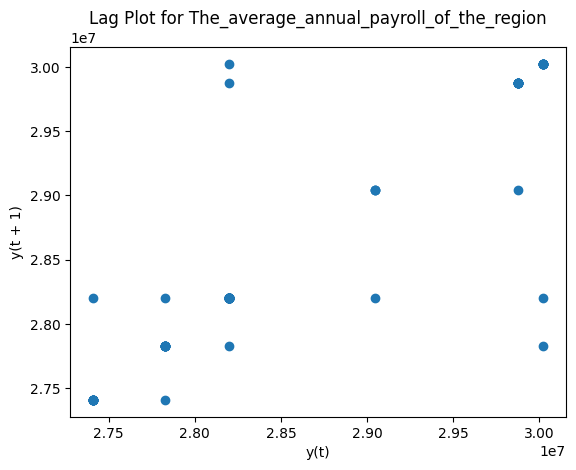

In [12]:
for column in df.columns:
    plt.figure()
    lag_plot(df[column])
    plt.title(f"Lag Plot for {column}")
    plt.show()

Autocorrelation and Partial Autocorrelation for Revenue


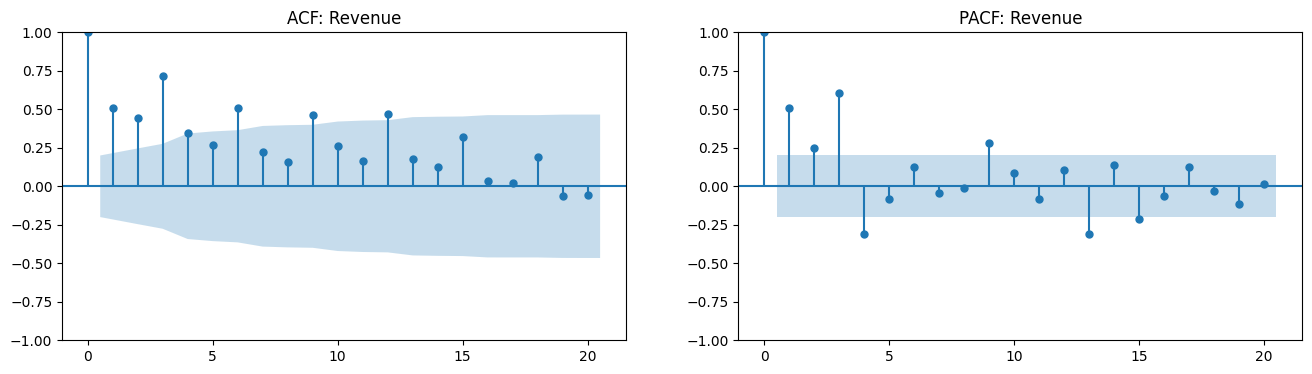

Autocorrelation and Partial Autocorrelation for Sales_quantity


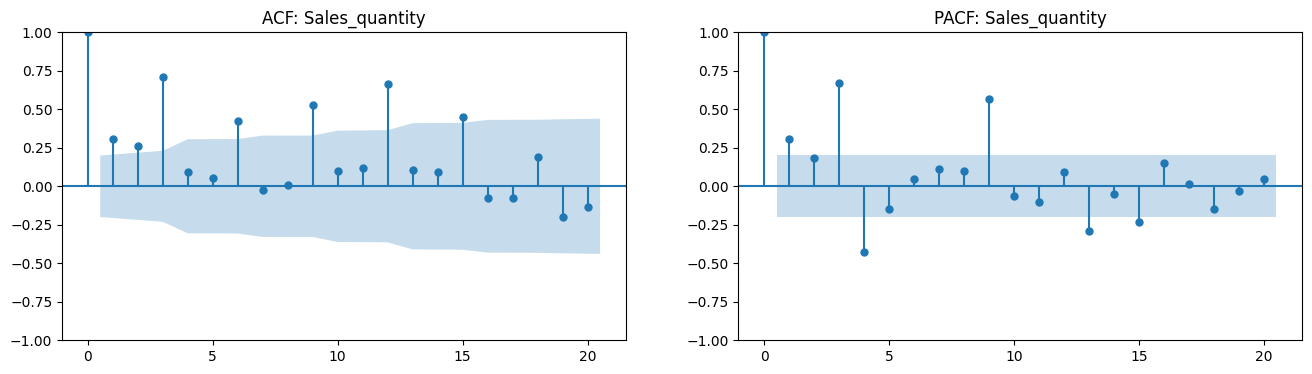

Autocorrelation and Partial Autocorrelation for Average_cost


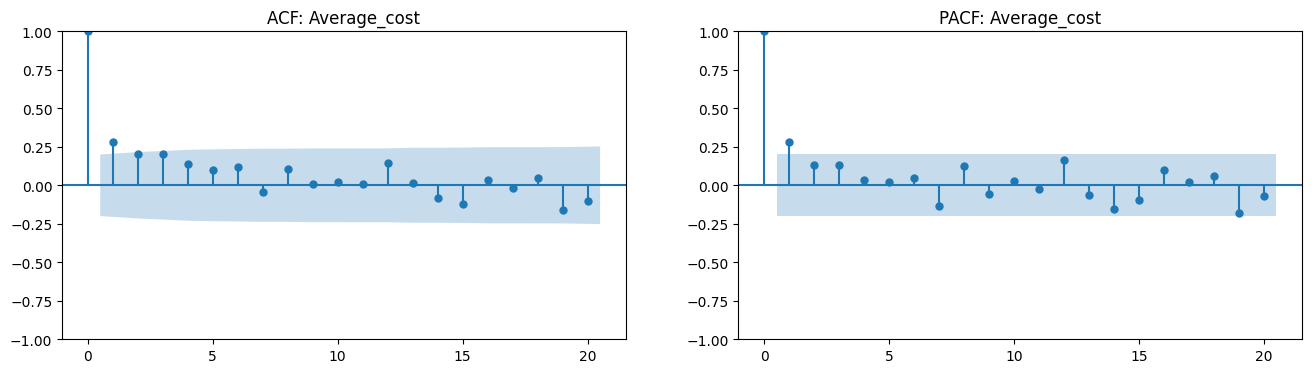

Autocorrelation and Partial Autocorrelation for The_average_annual_payroll_of_the_region


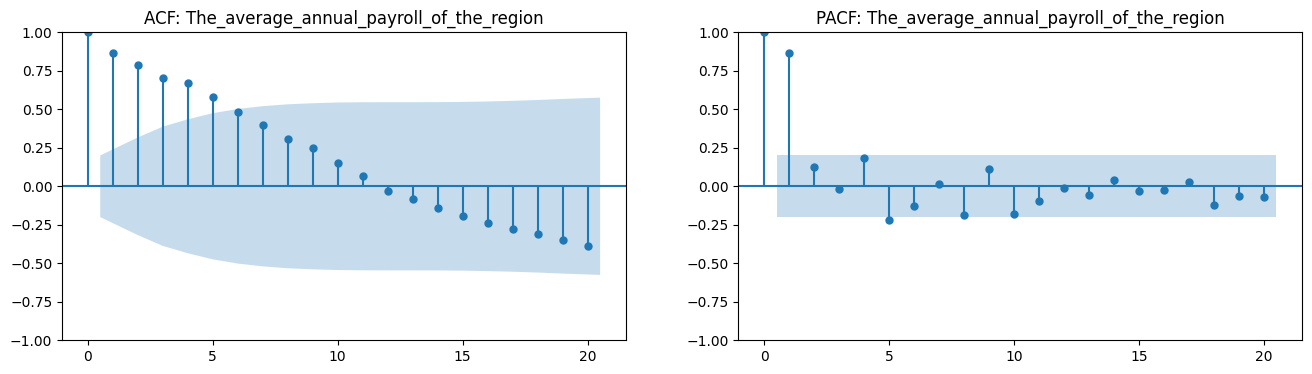

In [13]:
for column in df.columns:
    print(f"Autocorrelation and Partial Autocorrelation for {column}")
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    plot_acf(df[column], ax=axes[0], lags=20, title=f"ACF: {column}")
    plot_pacf(df[column], ax=axes[1], lags=20, title=f"PACF: {column}")
    plt.show()

In [14]:
# Create a new DataFrame with lagged versions of the original columns
lagged_df = pd.concat(
    [df.shift(i).add_suffix(f"_lag{i}") for i in range(1, 4)], axis=1  # Lag 1, 2, 3
)

# Concatenate the original DataFrame with the lagged features and remove any NaN values
lagged_df = pd.concat([df, lagged_df], axis=1).dropna()

# Display the first few rows of the new DataFrame with lagged values
print(lagged_df.head())

                 Revenue  Sales_quantity  Average_cost  \
Period                                                   
2015-01-04  1.881458e+07         15227.0   1235.606705   
2015-01-05  1.402148e+07          8620.0   1626.621765   
2015-01-06  1.678393e+07         13160.0   1275.374508   
2015-01-07  1.916189e+07         17254.0   1110.576805   
2015-01-08  1.520498e+07          8642.0   1759.428870   

            The_average_annual_payroll_of_the_region  Revenue_lag1  \
Period                                                               
2015-01-04                                30024676.0  2.204715e+07   
2015-01-05                                30024676.0  1.881458e+07   
2015-01-06                                30024676.0  1.402148e+07   
2015-01-07                                30024676.0  1.678393e+07   
2015-01-08                                30024676.0  1.916189e+07   

            Sales_quantity_lag1  Average_cost_lag1  \
Period                                          

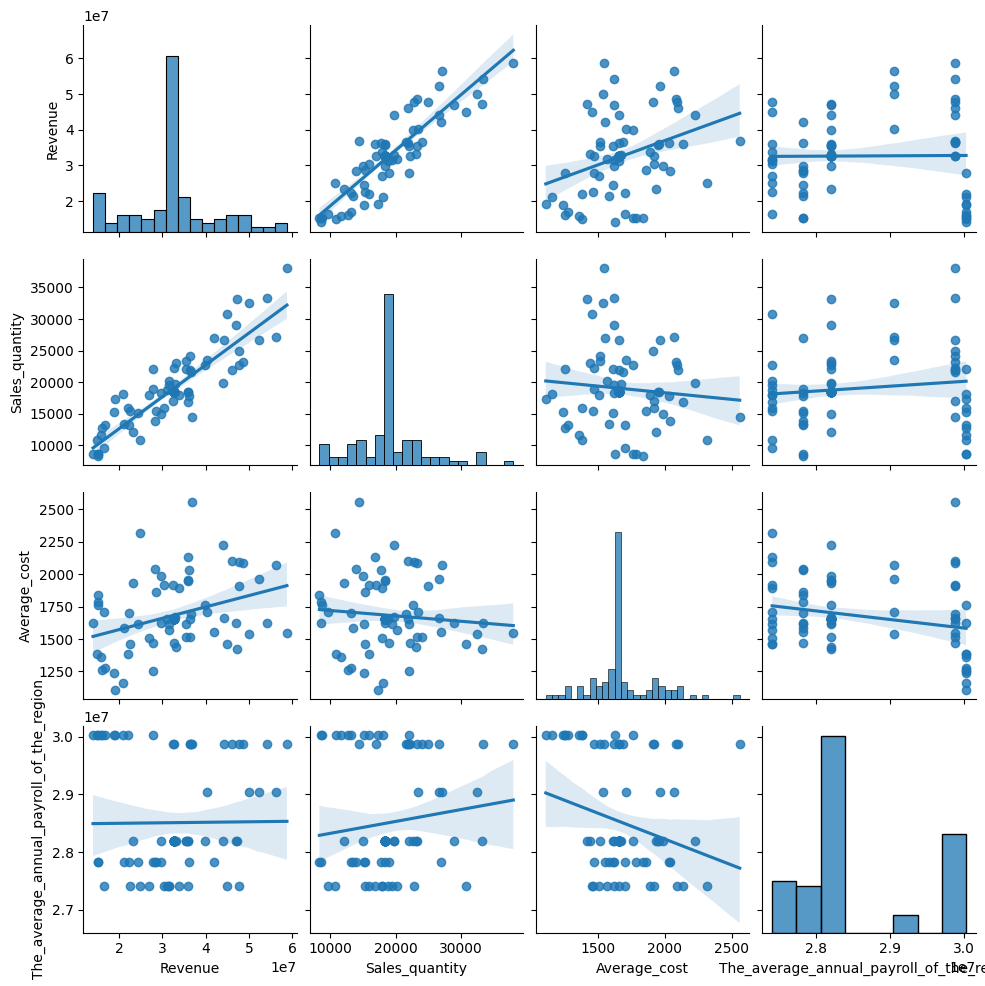

In [15]:
# Create pairwise scatter plots for all numerical columns in the DataFrame
sns.pairplot(df, kind="reg")

plt.show()